# Задание 1

Сравнить **МНК-оценку** для линейной регрессии с методом **наименьших модулей** в случае, когда шум порожден из распределения Лапласа. Когда оценки совпадают, а когда сильно различаются?

In [6]:
import numpy as np
import scipy.stats as st
import matplotlib.pylab as plt
import pandas as pd

%matplotlib inline
plt.rcParams['figure.figsize'] = (12, 8)

Пусть есть $n$ объектов с двумя признаками и $k = 1$ фактором

In [2]:
n = 1000
np.random.seed(1)
x = np.random.random(size=n)
x = np.reshape(x, (n, 1))
x0 = np.ones((n, 1))
X = np.concatenate((x0, x), axis=1)
X

array([[1.00000000e+00, 4.17022005e-01],
       [1.00000000e+00, 7.20324493e-01],
       [1.00000000e+00, 1.14374817e-04],
       ...,
       [1.00000000e+00, 6.68796606e-01],
       [1.00000000e+00, 3.25967207e-01],
       [1.00000000e+00, 7.74477266e-01]])

В рамках модели линейной регрессии предполагаем, что **отклик линейный**.

Также предполагаем, что шум порождён из распределения Лапласа.

In [3]:
weights = np.array([[1.], 
                    [1.]])

noise = st.laplace.rvs(scale=0.1, size=n, random_state=np.random.RandomState(seed=10))
noise = noise.reshape((n, 1))

y = np.dot(X, weights) + noise
y

array([[1.49525073],
       [1.4021277 ],
       [1.03121579],
       [1.37116998],
       [1.14645685],
       [1.0123974 ],
       [1.09365785],
       [1.41917902],
       [1.2883621 ],
       [1.36547501],
       [1.46551235],
       [1.92250598],
       [0.7203191 ],
       [1.88058611],
       [1.12553505],
       [1.69596346],
       [1.47591552],
       [1.50486195],
       [1.32090074],
       [1.25416464],
       [1.80963739],
       [1.84250315],
       [1.28421253],
       [1.73513468],
       [1.86402158],
       [1.88045353],
       [1.11190198],
       [1.04171757],
       [1.20561146],
       [1.90071693],
       [1.19262221],
       [1.42553357],
       [2.12787929],
       [1.48829757],
       [1.52090636],
       [1.26466615],
       [1.53864624],
       [1.94173394],
       [0.78162139],
       [1.77925635],
       [1.99886216],
       [1.84993545],
       [1.1882873 ],
       [1.91435105],
       [1.06802958],
       [1.51908482],
       [1.8561577 ],
       [1.439

Распределение шума

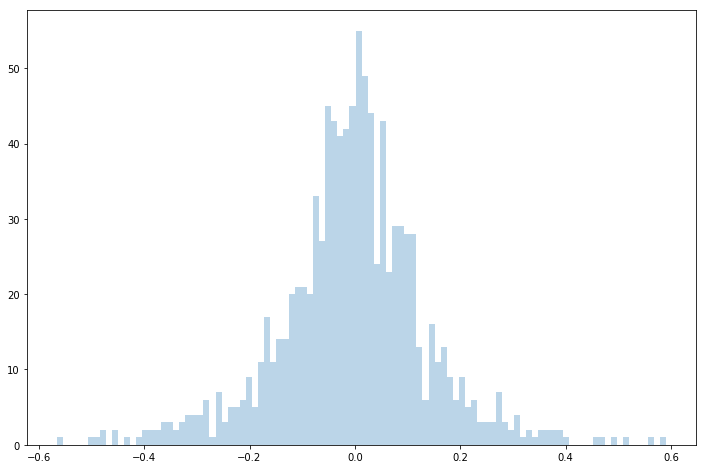

In [7]:
noise = st.laplace.rvs(scale=0.1, size=n, random_state=np.random.RandomState(seed=10))
plt.hist(noise, normed=False, histtype='stepfilled', alpha=0.3, bins = 100)
plt.show()

Признаки объектов на плоскости

Text(0, 0.5, 'y')

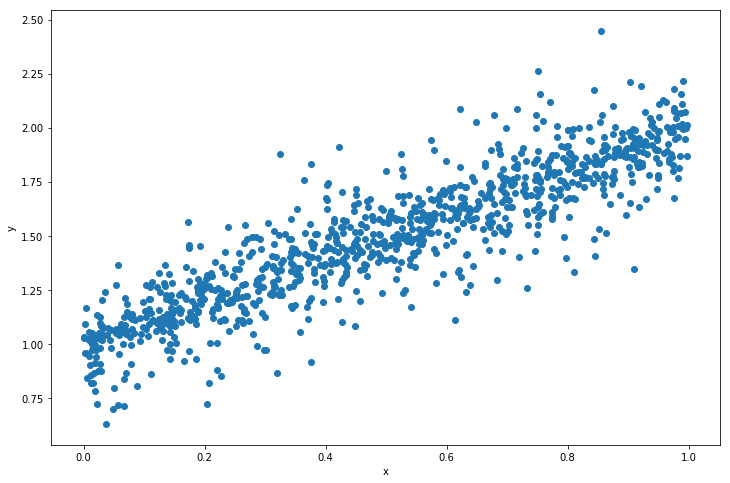

In [8]:
plt.scatter(x, y)
plt.xlabel('x')
plt.ylabel('y')

Text(0, 0.5, 'y')

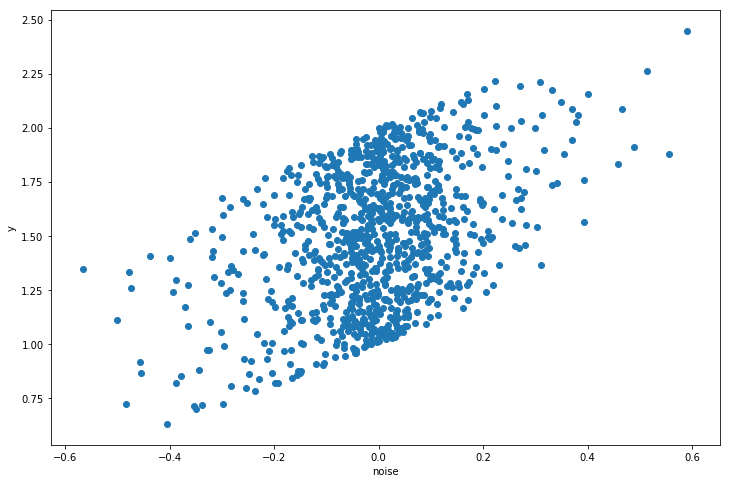

In [9]:
plt.scatter(noise, y)
plt.xlabel('noise')
plt.ylabel('y')

# Сравнение

Сравним МНК-оценку и метод наименьших модулей.

Воспользуемся методом minimize для реализации данных методов.

In [10]:
from scipy.optimize import minimize

In [11]:
def costLAEfunction(weigths, X, y):
    weigths = weigths.reshape((2, 1))
    return np.sum(np.abs(y - np.dot(X, weigths)))


def costLSEfunction(weigths, X, y):
    weigths = weigths.reshape((2, 1))
    return np.sum((y - np.dot(X, weigths))**2)

Least Absolute Error (LAE)

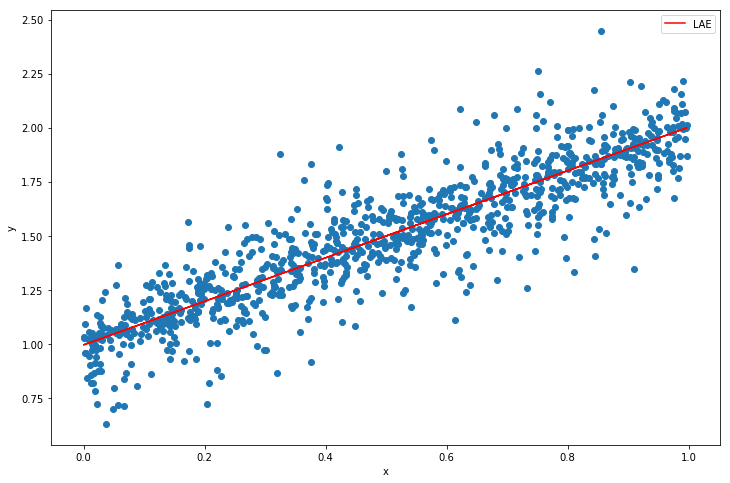

array([[0.99552018],
       [1.00660037]])

In [111]:
w0 = np.array([[1.], 
               [1.]])
w = minimize(costLAEfunction, w0, args=(X, y), method='BFGS', tol=1e-6)
betaA = w.x
betaA = betaA.reshape((2, 1))

y_hat = np.dot(X, betaA)
plt.scatter(x, y)
plt.plot(x, y_hat, color='red', label='LAE')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.show()
betaA

Least Squares Error (LSE)

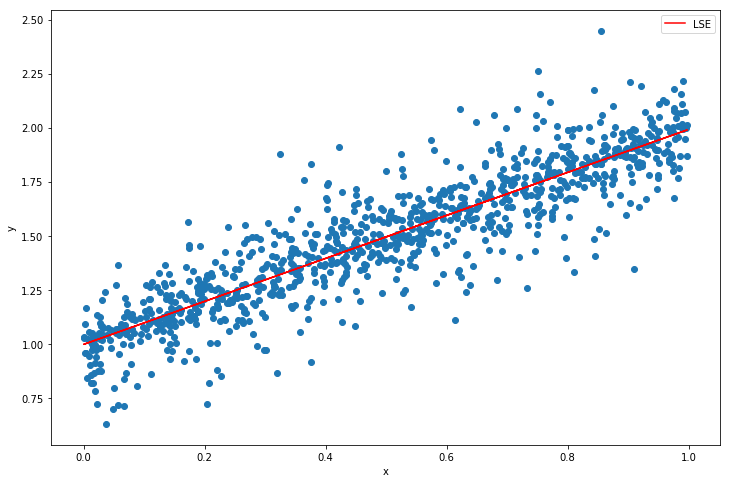

array([[0.9976596 ],
       [0.99415312]])

In [112]:
w0 = np.array([[1.], 
               [1.]])
w = minimize(costLSEfunction, w0, args=(X, y), method='BFGS', tol=1e-6)
betaS = w.x
betaS = betaS.reshape((2, 1))

y_hat = np.dot(X, betaS)
plt.scatter(x, y)
plt.plot(x, y_hat, color='red', label='LSE')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.show()
betaS

В случае хорошей группировки точек оценки методов очень близки.

Теперь добавим выбросы в данные.

In [113]:
m = 10
np.random.seed(2)
xE = 2*np.random.random(size=m) - 1
xE = np.reshape(xE, (m, 1))
xE0 = np.ones((m, 1))
Ejections = np.concatenate((xE0, xE), axis=1)

In [114]:
weights = np.array([[10.], 
                    [-5.]])

noise = st.laplace.rvs(scale=0.1, size=m, random_state=np.random.RandomState(seed=100))
noise = noise.reshape((m, 1))

yE = np.dot(Ejections, weights) + noise

XE = np.concatenate((X, Ejections), axis=0)
YE = np.concatenate((y, yE), axis=0)
YE

array([[ 1.49525073],
       [ 1.4021277 ],
       [ 1.03121579],
       ...,
       [ 8.91276103],
       [11.87377615],
       [12.3480011 ]])

Text(0, 0.5, 'y')

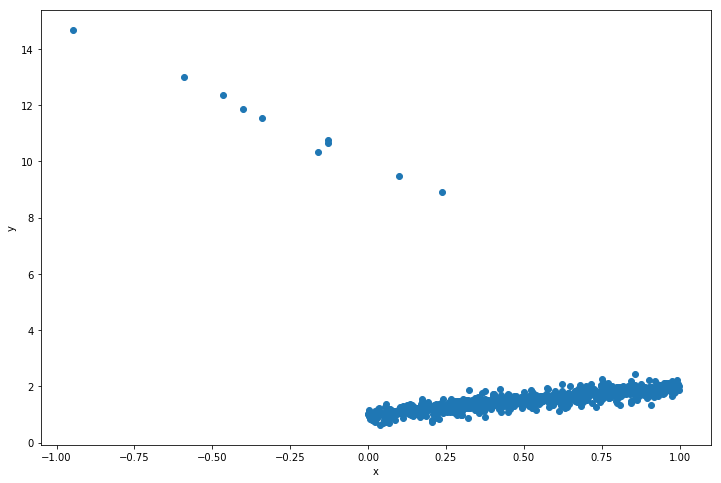

In [115]:
plt.scatter(XE[:, 1], YE)
plt.xlabel('x')
plt.ylabel('y')

Least Absolute Error (LAE)

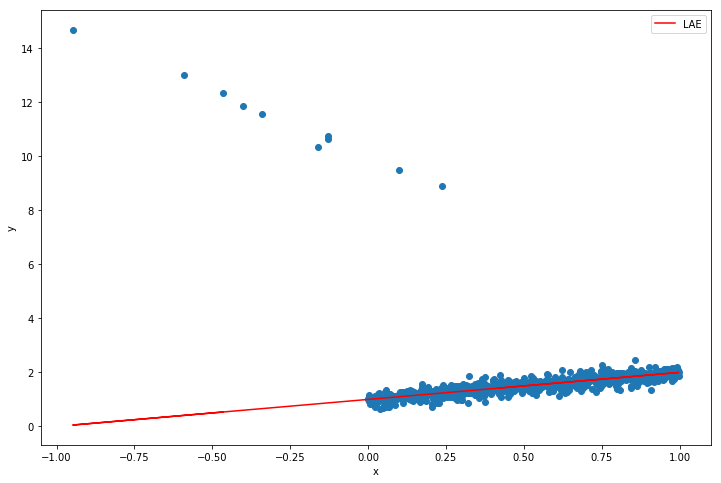

array([[1.0002728 ],
       [1.00024922]])

In [116]:
w0 = np.array([[1.], 
               [1.]])
w = minimize(costLAEfunction, w0, args=(XE, YE), method='BFGS', tol=1e-6)
betaAE = w.x
betaAE = betaAE.reshape((2, 1))

y_hat = np.dot(XE, betaAE)
plt.scatter(XE[:, 1], YE)
plt.plot(XE[:, 1], y_hat, color='red', label='LAE')

plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.show()
betaAE

Least Squares Error (LSE)

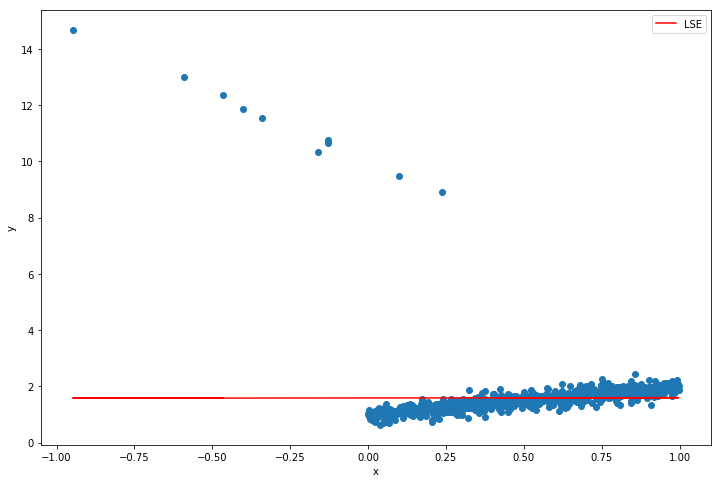

array([[1.58807828],
       [0.00999498]])

In [117]:
w0 = np.array([[1.], 
               [1.]])
w = minimize(costLSEfunction, w0, args=(XE, YE), method='BFGS', tol=1e-6)
betaSE = w.x
betaSE = betaSE.reshape((2, 1))

y_hat = np.dot(XE, betaSE)
plt.scatter(XE[:, 1], YE)
plt.plot(XE[:, 1], y_hat, color='red', label='LSE')

plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.show()
betaSE

Мы видим, что при добавлении выбросов МНК-оценка ощутимо сдвигается, в то время как оценка методом наименьших модулей остаётся примерно такой же.

Посмотрим разницу на одном графике.

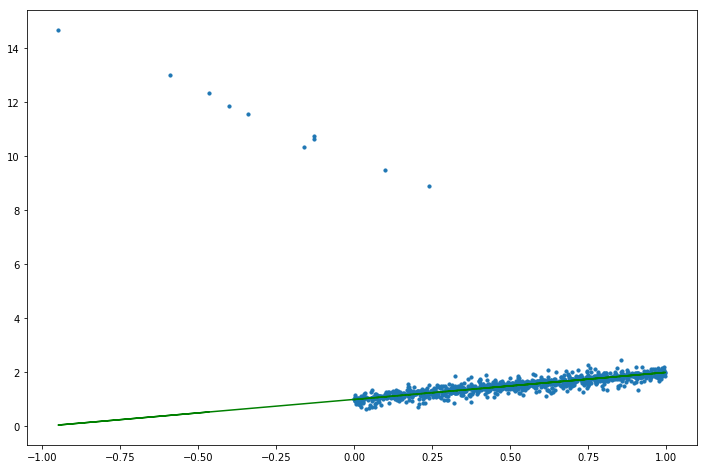

In [118]:
plt.scatter(XE[:, 1], YE, s = 10)
y_hat = np.dot(XE, betaAE)
plt.plot(XE[:, 1], y_hat, color='green', label='LAE')
y_hat = np.dot(X, betaA)
plt.plot(X[:, 1], y_hat, '--', color='green', label='LAE')

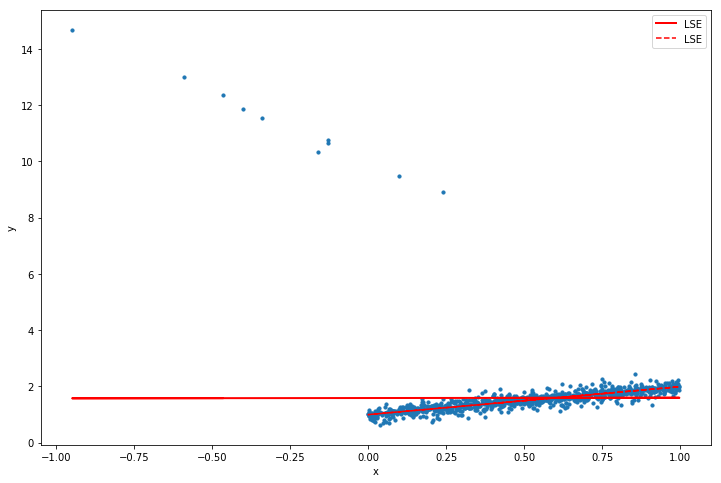

In [119]:
plt.scatter(XE[:, 1], YE, s = 10)
y_hat = np.dot(XE, betaSE)
plt.plot(XE[:, 1], y_hat, color='red', linewidth=2, label='LSE')
y_hat = np.dot(X, betaS)
plt.plot(X[:, 1], y_hat, '--', color='red', label='LSE')

plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.show()

# Вывод

МНК-оценка и оценка методом наименьших модулей близки при хорошем наложении на линейную зависимость всех данных. Однако **при наличии выбросов оценки существенно различаются**: метод LSE более чувствителен к выбросам, чем метод LAE - этим свойством можно пользоваться при желании учесть/исключить выбросы в данных.